In [1]:
# Imports
from numpy import array, vstack, empty, sqrt, trace, sin, cos, pi, corrcoef, linspace, arange
from numpy.linalg import inv, eig
import matplotlib.pyplot as plt
from lib.convert import deg2rad


# Satellite azimut and elevation
satpos = [(0, 15), (120, 15), (240, 15), (0, 90)]
#satpos = [(0, 15), (90, 15), (180, 15), (270, 15)]


# Create design matrix (enu)
def H0(satpos):
    H = empty(shape=[0, 4])
    for az, el in satpos:
        el = deg2rad(el); az = deg2rad(az)
        H = vstack([H, [cos(el)*sin(az), cos(el)*cos(az), sin(el), 1]])
    
    return H


# Plot error ellipse 2D
def error_ellipse2D(C):
    eigval, eigvec = eig(C)
    theta = linspace(0, 2*pi, 1000);
    ellipse = (1/sqrt(eigval[None, :])*eigvec)@[sin(theta), cos(theta)]
    plt.title("Error ellipse 2D")
    plt.plot(ellipse[0, :], ellipse[1, :])
    plt.grid()
    plt.show()


# Design matrix
H = H0(satpos)


# Cofactor matrix
Q = inv(H.T@H)


# Dilution of precision
gdop=sqrt(trace(Q))
pdop=sqrt(trace(Q[0:3, 0:3]))
hdop=sqrt(trace(Q[0:2, 0:2]))
vdop=sqrt(Q[2, 2])
tdop=sqrt(Q[3, 3])

print("GDOP: {:4.1f}".format(gdop))
print("PDOP: {:4.1f}".format(pdop))
print("HDOP: {:4.1f}".format(hdop))
print("VDOP: {:4.1f}".format(vdop))
print("TDOP: {:4.1f}".format(tdop))

# Correlation coefficients
R = corrcoef(Q)
print(R)

GDOP:  2.1
PDOP:  2.0
HDOP:  1.2
VDOP:  1.6
TDOP:  0.9
[[ 1.         -0.33333333 -0.15163126  0.07818209]
 [-0.33333333  1.         -0.15163126  0.07818209]
 [-0.15163126 -0.15163126  1.         -0.9915726 ]
 [ 0.07818209  0.07818209 -0.9915726   1.        ]]


[[ 6.43078062e+00 -1.78551356e-15]
 [-1.78551356e-15  6.43078062e+00]]


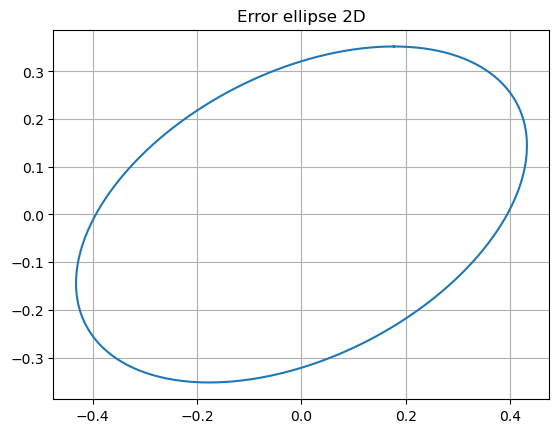

In [2]:
# Standard deviation
sigma0 = 3

# Covariance matrix
SIGMAx = sigma0**2*Q
print(SIGMAx[0:2, 0:2])

# Plot error ellipse
error_ellipse2D(SIGMAx[0:2, 0:2])

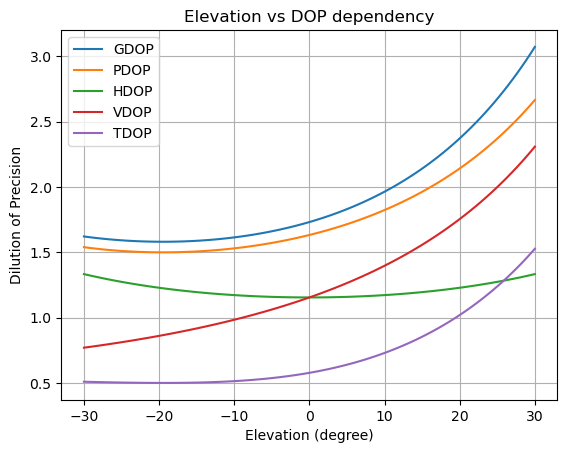

In [3]:
# Generate elevation plot data

# Elevation interval
elint = linspace(-30, 30, 100)

# Initialize plot vectors
gdop = []; pdop = []; hdop = []; vdop = []; tdop = []

# For all elevations in interval
for el in elint:
    
    # Satellite azimuth and elevation
    satpos = [(0, el), (120, el), (240, el), (0, 90)]
    
    # Design matrix
    H = H0(satpos)
    
    # Cofactor matrix
    Q = inv(H.T@H)
    
    # Generate plot vectors
    gdop.append(sqrt(trace(Q)))
    pdop.append(sqrt(trace(Q[0:3, 0:3])))
    hdop.append(sqrt(trace(Q[0:2, 0:2])))
    vdop.append(sqrt(Q[2, 2]))
    tdop.append(sqrt(Q[3, 3]))


# Plot elevation dependency
plt.title("Elevation vs DOP dependency")
plt.xlabel("Elevation (degree)")
plt.ylabel("Dilution of Precision")
plt.plot(elint, gdop, label="GDOP")
plt.plot(elint, pdop, label="PDOP")
plt.plot(elint, hdop, label="HDOP")
plt.plot(elint, vdop, label="VDOP")
plt.plot(elint, tdop, label="TDOP")
plt.legend()
plt.grid()
plt.show()